# Q1. What are the different types of clustering algorithms, and how do they differ in terms of their approach and underlying assumptions?

# ANS:-


- There are several types of clustering algorithms, each with its approach and underlying assumptions
   - K-means: Assigns each data point to the nearest centroid and updates the centroids iteratively until convergence. Assumes clusters are spherical and of similar size.
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Groups together points that are closely packed (dense) and marks points in low-density regions as outliers. Does not assume spherical clusters and can handle clusters of arbitrary shape.


- Hierarchical Clustering:
Agglomerative: Starts with each point as a cluster and merges them based on distance until only one cluster remains. Produces a dendrogram representing the hierarchy.

# Q2.What is K-means clustering, and how does it work?

# ANS:-


- K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters. It works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the mean of the data points assigned to each cluster. The algorithm continues this process until the centroids no longer change significantly, indicating convergence.

- Let's explain K-means clustering using a real dataset, such as the Iris dataset, which contains measurements of iris flowers' sepal length, sepal width, petal length, and petal width.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
import numpy as np


In [6]:
x=iris.data

In [7]:
initial_centroids=x[:,3]

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
from scipy.spatial.distance import cdist

In [12]:
x.ndim

2

In [24]:
initial_centroids

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [23]:
initial_centroids=initial_centroids.reshape((150,1))

In [16]:
print(initial_centroids.shape)

(150,)


In [21]:
print(x.shape)

(150, 4)


In [26]:
print("Shape of x:", x.shape)
print("Shape of initial_centroids:", initial_centroids.shape)

Shape of x: (150, 4)
Shape of initial_centroids: (150, 1)


In [27]:
x = x[:, :initial_centroids.shape[1]]

In [28]:
distances = cdist(x, initial_centroids)

In [29]:
clusters=np.argmin(distances,axis=1)

In [31]:
# Update centroids
new_centroids = np.array([x[clusters == i].mean(axis=0) for i in range(len(initial_centroids))])


<ipython-input-31-610ff1e70eab>:2: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([x[clusters == i].mean(axis=0) for i in range(len(initial_centroids))])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


# Q3. What are some advantages and limitations of K-means clustering compared to other clustering techniques?

# ANS:-


- K-means clustering has several advantages and limitations compared to other clustering techniques. Let's explore these aspects using a real dataset example and discuss when K-means clustering is suitable and when it may face challenges.

- Advantages of K-means Clustering:

  - Ease of Implementation: K-means clustering is straightforward to implement and computationally efficient, making it suitable for large datasets.

  - Scalability: It can handle a large number of data points efficiently, making it scalable for big data applications.

  - Interpretability: The resulting clusters in K-means are easy to interpret and understand, especially when the clusters are well-separated.
  
  - Speed: K-means converges relatively quickly, especially when the clusters are well-separated and have a roughly equal number of data points.

  - Versatility: It can work well with numerical data and is robust to noise and outliers to some extent.

- Limitations of K-means Clustering:

  - Assumption of Spherical Clusters: K-means assumes that clusters are spherical and of similar sizes, which may not hold true for all datasets.

  - Sensitive to Initial Centroids: The final clustering result can vary depending on the initial centroid locations, which can lead to suboptimal solutions.

  - Number of Clusters (K) Selection: Choosing the right number of clusters (K) can be challenging and may require domain knowledge or trial-and-error.

  - Handling Non-linear Data: K-means may struggle with non-linearly separable data or clusters of irregular shapes.

  - Impact of Outliers: Outliers can significantly impact the centroids and cluster assignments, potentially leading to skewed results.

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
iris=load_iris()

In [4]:
x=iris.data

In [5]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [6]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [7]:
y_kmeans=kmeans.predict(x)

In [8]:
centroids=kmeans.cluster_centers_

In [9]:
print(f"centroids are {centroids}")

centroids are [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


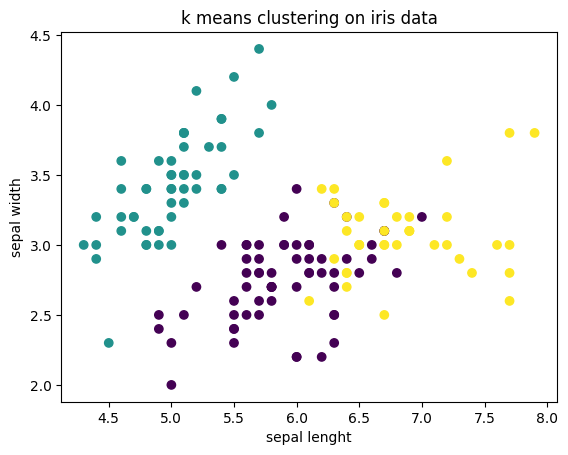

In [18]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap='viridis')
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.title('k means clustering on iris data')
plt.show()

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

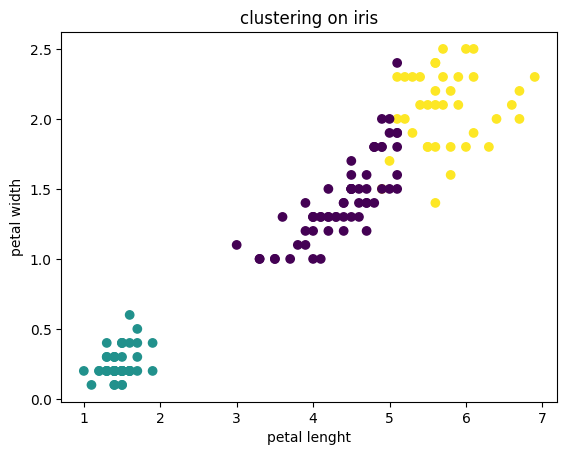

In [20]:
plt.scatter(x[:,2],x[:,3],c=y_kmeans,cmap='viridis')
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.title('clustering on iris')
plt.show()

# Q4. How do you determine the optimal number of clusters in K-means clustering, and what are some common methods for doing so?

# ANS ▶

- Determining the optimal number of clusters in K-means clustering is an important step to ensure meaningful and accurate clustering results. Several methods can help determine the optimal number of clusters, and some common ones include the Elbow Method, Silhouette Score, and Gap Statistic. Let's discuss each method briefly and then provide a real dataset example using the Elbow Method.


- Elbow Method:
  - The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (K) and identifying the "elbow" point where the rate of decrease in WCSS slows down significantly.
The optimal number of clusters is often chosen at the elbow point, as adding more clusters beyond this point may not significantly reduce the WCSS.
Code Example with the Iris dataset:


In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [22]:
iris=load_iris()

In [23]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
x=iris.data

In [27]:
wcss=[]

In [28]:
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [29]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.46949589883801,
 30.1865551948052,
 28.28937085137085,
 26.552373141564317]

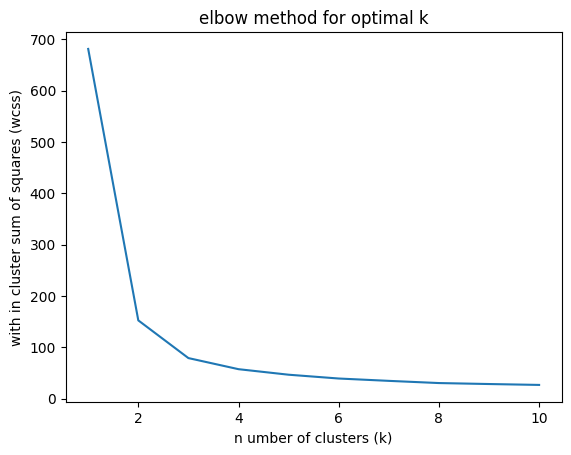

In [30]:
plt.plot(range(1,11),wcss)
plt.xlabel('n umber of clusters (k)')
plt.ylabel('with in cluster sum of squares (wcss)')
plt.title('elbow method for optimal k')
plt.show()

# Q5. What are some applications of K-means clustering in real-world scenarios, and how has it been used to solve specific problems?

# ANS ▶


- K-means clustering is a versatile algorithm with various real-world applications across different domains. Here are some applications of K-means clustering along with real dataset code examples for each:

- Dataset: Online Retail Dataset
- Objective: Identify distinct customer segments based on their purchasing behavior.

In [31]:
pip install opendatasets --upgrade

In [32]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/puneetbhaya/online-retail'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nasimakram
Your Kaggle Key: ··········


100%|██████████| 21.8M/21.8M [00:00<00:00, 80.7MB/s]


In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
data=pd.read_excel('/content/online-retail/Online Retail.xlsx')

In [35]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [37]:
data.drop(['Description','CustomerID'],axis=1,inplace=True)

In [39]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.8+ MB


In [41]:
data.shape

(541909, 6)

In [42]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [43]:
data['InvoiceNo'].head()

0    536365
1    536365
2    536365
3    536365
4    536365
Name: InvoiceNo, dtype: object

In [44]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom


In [45]:
x=data[['Quantity','UnitPrice']]

In [46]:
kmean=KMeans(n_clusters=4)

In [47]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [48]:
labels=kmeans.labels_

In [50]:
y_kmeans=kmeans.predict(x)

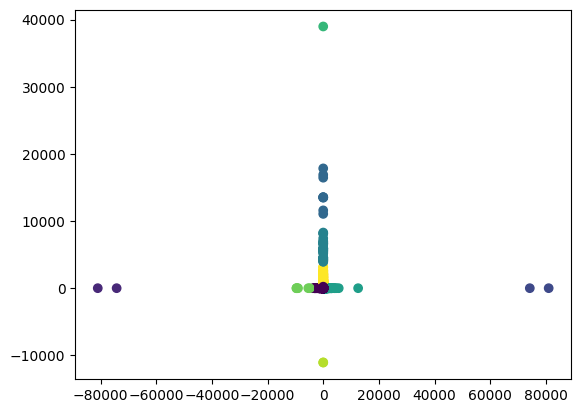

In [54]:
plt.scatter(x['Quantity'],x['UnitPrice'],c=labels,cmap='viridis')

# Q6. How do you interpret the output of a K-means clustering algorithm, and what insights can you derive from the resulting clusters?

In [55]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform K-means clustering with k=3 (since there are three species of iris)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Add the cluster labels to the Iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Cluster'] = y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=iris.feature_names))


Cluster Centers:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.901613          2.748387           4.393548          1.433871
1           5.006000          3.428000           1.462000          0.246000
2           6.850000          3.073684           5.742105          2.071053


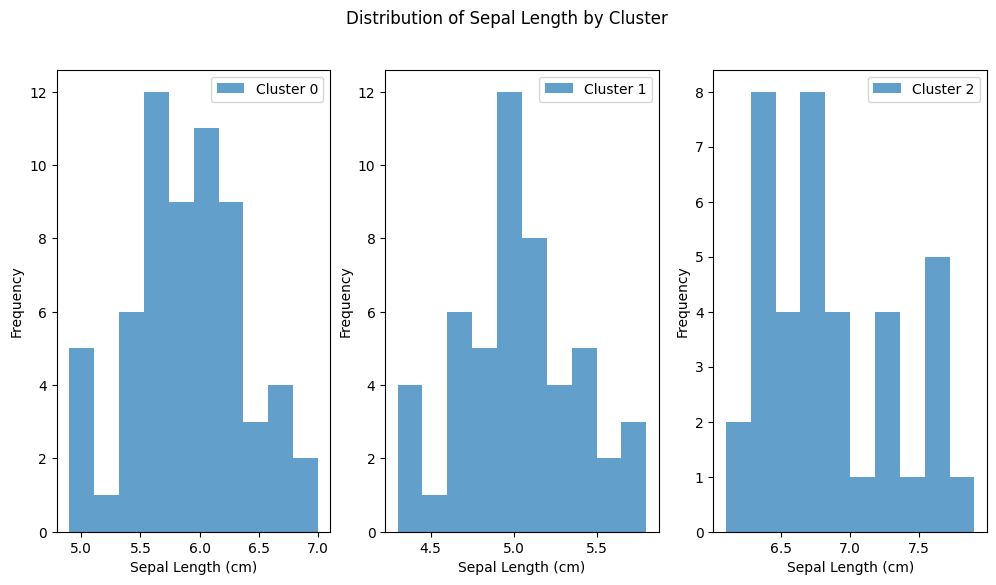

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(iris_df[iris_df['Cluster'] == i]['sepal length (cm)'], bins=10, alpha=0.7, label=f'Cluster {i}')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Distribution of Sepal Length by Cluster')
plt.show()


In [58]:
iris_df['Target'] = iris.target
cluster_membership = iris_df.groupby(['Cluster', 'Target']).size().unstack(fill_value=0)
print("Cluster Membership:")
print(cluster_membership)


Cluster Membership:
Target    0   1   2
Cluster            
0         0  48  14
1        50   0   0
2         0   2  36
